In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [3]:
df = pd.read_excel("/content/drive/MyDrive/23-1 KUIAI/inf_post_info2.xlsx", sheet_name=0)
df

,user_name,post_id,text,timestamp,like,video
0,0nefence,3008175603962386523,어제 업로드 하려고 했어요 진짜에요,2023-01-04 08:54:58,526.0,0.0
1,0nefence,3006778853318091854,옷장에 옷은 많은데 당장 내일은 뭐 입어야 될지 모르겠어요 • •? 🤔,2023-01-02 10:39:52,-1.0,0.0
2,0nefence,3006161204775157958,#협찬 @myfipn_official \n\n다들 새해 첫날 어떻게 보내셨나요?\n...,2023-01-01 14:12:43,521.0,0.0
3,0nefence,3005347722609627475,마지막 인사 올립니다 꾸벅,2022-12-31 11:16:28,532.0,0.0
4,0nefence,3004577405444400836,한살 먹는 건 모르겠고 빨리 쉬고싶어요 🥹,2022-12-30 09:45:59,-1.0,0.0
...,...,...,...,...,...,...
2984,zxcvr0626,2984110606145023524,@wbae_drawing 작가님께서 또 저를 모델로 일러스트를 그려주셨어요\n.\n...,2022-12-02 04:02:07,2963.0,NaN
2985,zxcvr0626,2984038992086664126,#ootd #dailylook \n.\n연차룩!\n.\n아빠들! 동두천 자연휴양림 ...,2022-12-02 01:39:49,327.0,NaN
2986,zxcvr0626,2983407097640456728,#ootd #dailylook \n.\n마법천자문 들고 한 컷 ㅋㅋ\n.\n\nTo...,2022-12-01 04:44:22,505.0,NaN
2987,zxcvr0626,2982647916184572192,#ootd #dailylook \n.\n춥다. 뼈가 시리다 😂😂\n.\nTop : ...,2022-11-30 03:36:00,441.0,NaN


In [4]:
# id기준으로 합치기
id = df['user_name'].unique()

list = []
for word in df['user_name'].unique():
  list.append(  df[df['user_name'] == word ]['text'].values)

In [5]:
data={'user_name' : id, 'text': list}
df2 = pd.DataFrame(data)
df2

,user_name,text
0,0nefence,"[어제 업로드 하려고 했어요 진짜에요, 옷장에 옷은 많은데 당장 내일은 뭐 입어야 ..."
1,166.ootd,[.\n\n어제는 야근은 안 하고 회식을 ..🤔\n혹싀 야근 vs 회식 뭐가 더 싫...
2,337janggoon,[한 해를 돌아보는 시간을 좀 가져보려구요.\n잠시 쉬며 새해맞이 여행도 다녀올게요...
3,1ungwoo,"[#협찬 발마칸에 스웻셋업, 후드는 약간 조여서🖤\n\n요번 시즌 발마칸이 많이 보..."
4,59seok,[맘에 드는 패딩을 구매하기까지 꽤나 오랜 시간이 걸렸네요.\n\n이번에 구매한 뉴...
...,...,...
95,yummy.__.do,"[#협찬\n요즘 머플러 없음 안돼,,🥶\n⠀\n⠀\n⠀\n⠀\n⠀\n-이번에 @so..."
96,yulkeem___,[편집하다가.. 모르고 공유 눌러버렸네.. \n망해쒀 쳇…;; \n여러분덜 수요팅입...
97,ys971003__,[#ZENZ 와 함께 추억을 기록하고 싶어✨\n\n2년 반이 넘는 시간동안 주에 적...
98,z___meme,[룰루 랄라..\n.\n.\n#더플코트 #숏더플코트 #후드코트 #코트코디 #여자쇼핑...


### 불용어처리 & 토큰화
- 기본 불용어는 https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt 에 있는 자료로 사용

In [ ]:
# bash 셸로 명령어 입력하여 라이브러리 설치하기

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [7]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [9]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

mecab  = Mecab()

In [10]:
with open('/content/drive/MyDrive/23-1 KUIAI/kor_stopwords.txt', 'r',encoding='cp949') as f:
    list_file = f.readlines()
stopword_list = list_file[0].split(",")

stopword_list[:10]  #한국어 불용어 목록 다운받은거

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해']

In [11]:
stopword_list.extend(['광고', '협찬', '광고협찬', '좋반','코디', '추천','패션',  '세용', '세요', '착장', '업데이트', '준비'])  #우리가 지정할 거

In [12]:
df2['text'] = df2['text'].astype(str)

In [13]:
df2['text'] = df2['text'].str.replace('&#39;',"'")
df2['text'] = df2['text'].str.replace('&quot;','"')
df2['text'] = df2['text'].str.replace('&gt;',">")
df2['text'] = df2['text'].str.replace('&lt;',"<")
df2['text'] = df2['text'].str.replace('&amp;',"&")
df2['text'] = df2['text'].str.replace('\n',"")
df2['text'] = df2['text'].str.replace('[',"")
df2['text'] = df2['text'].str.replace(']',"")

<ipython-input-13-4a04bf96a81a>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['text'] = df2['text'].str.replace('[',"")
<ipython-input-13-4a04bf96a81a>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['text'] = df2['text'].str.replace(']',"")


In [14]:
import re
def alpha_num(text):
    txt = text.replace('n','')
    return re.sub(r'[^가-힣]', '', text)

In [15]:
def remove_stopwords(txt):
    final_text = []
    tokenizer = Mecab()
    words = tokenizer.morphs(txt)
    for word in words:
        if word.strip() not in stopword_list :
          final_text.append(word.strip())
    return  " ".join(final_text)

df2['new_text'] = df2['text'].apply(alpha_num).apply(remove_stopwords)

In [16]:
df2['new_text']

0     어제 업로드 려고 했 어요 옷장 옷 은 많 은데 내일 은 뭐 입 어야 될지 모르 겠...
1     어제 는 야근 은 안 고 회식 혹 싀 야근 회식 뭐 더 싫 으세요 피곤 해서 대충 ...
2     한 해 돌아보 는 가져 보 려구요 쉬 며 새 해맞이 여행 도 다녀올게요 해 피뉴 이...
3     발마 칸 에스 웻 업 후드 는 조여서 요번 시즌 발마 칸 보이 던데 다 씩 있 으시...
4     맘 드 는 패딩 구매 기 꽤 나오 랜 걸렸 네요 구매 한 뉴 발란스 카메라맨 은 나...
                            ...                        
95    요즘 머플러 없 음 안 돼 이쁜 후 디 선물 받 았 는데요 후디 는 색감 도 잘 나...
96    편집 다가 모르 고 공유 눌러 버렸 망해 쒀 덜 수요 팅 입 니당 제품 휴일 집 만...
97    추억 기록 고 싶 반 넘 는 주 적어도 번 은 일상 공유 는 피드 올려왔 끝 나가 ...
98    룰루랄라 더플코트 숏 더플코트 후드 코트 코트 여자 쇼핑몰 캐주얼 룩 여자 캐즈 얼...
99    며칠 더 있 음 사진 찍 는 더 환해질 듯 개 파카 울리 치울 셔츠 케이블 니트 일...
Name: new_text, Length: 100, dtype: object

In [17]:
df2

,user_name,text,new_text
0,0nefence,'어제 업로드 하려고 했어요 진짜에요' '옷장에 옷은 많은데 당장 내일은 뭐 입어야...,어제 업로드 려고 했 어요 옷장 옷 은 많 은데 내일 은 뭐 입 어야 될지 모르 겠...
1,166.ootd,'.\n\n어제는 야근은 안 하고 회식을 ..🤔\n혹싀 야근 vs 회식 뭐가 더 싫...,어제 는 야근 은 안 고 회식 혹 싀 야근 회식 뭐 더 싫 으세요 피곤 해서 대충 ...
2,337janggoon,'한 해를 돌아보는 시간을 좀 가져보려구요.\n잠시 쉬며 새해맞이 여행도 다녀올게요...,한 해 돌아보 는 가져 보 려구요 쉬 며 새 해맞이 여행 도 다녀올게요 해 피뉴 이...
3,1ungwoo,"'#협찬 발마칸에 스웻셋업, 후드는 약간 조여서🖤\n\n요번 시즌 발마칸이 많이 보...",발마 칸 에스 웻 업 후드 는 조여서 요번 시즌 발마 칸 보이 던데 다 씩 있 으시...
4,59seok,'맘에 드는 패딩을 구매하기까지 꽤나 오랜 시간이 걸렸네요.\n\n이번에 구매한 뉴...,맘 드 는 패딩 구매 기 꽤 나오 랜 걸렸 네요 구매 한 뉴 발란스 카메라맨 은 나...
...,...,...,...
95,yummy.__.do,"'#협찬\n요즘 머플러 없음 안돼,,🥶\n⠀\n⠀\n⠀\n⠀\n⠀\n-이번에 @so...",요즘 머플러 없 음 안 돼 이쁜 후 디 선물 받 았 는데요 후디 는 색감 도 잘 나...
96,yulkeem___,'편집하다가.. 모르고 공유 눌러버렸네.. \n망해쒀 쳇…;; \n여러분덜 수요팅입...,편집 다가 모르 고 공유 눌러 버렸 망해 쒀 덜 수요 팅 입 니당 제품 휴일 집 만...
97,ys971003__,'#ZENZ 와 함께 추억을 기록하고 싶어✨\n\n2년 반이 넘는 시간동안 주에 적...,추억 기록 고 싶 반 넘 는 주 적어도 번 은 일상 공유 는 피드 올려왔 끝 나가 ...
98,z___meme,'룰루 랄라..\n.\n.\n#더플코트 #숏더플코트 #후드코트 #코트코디 #여자쇼핑...,룰루랄라 더플코트 숏 더플코트 후드 코트 코트 여자 쇼핑몰 캐주얼 룩 여자 캐즈 얼...


In [ ]:
df2.to_csv("/content/drive/MyDrive/23-1 KUIAI/topic_preproc.csv", index=False)

### 워드클라우드
- counter객체로 빈도수 확인해주기

In [18]:
from collections import defaultdict, Counter
from wordcloud import WordCloud

tokenizer = Mecab()
token_sentences = [tokenizer.nouns(text) for text in df2['new_text']] 

In [19]:
counter = Counter()
for text in token_sentences:
  counter.update(text)

In [20]:
text_list = []
for word in df2['user_name'].unique():
  text_list.append( df2[df2['user_name'] == word ]['new_text'].values)


In [21]:
filter_pos = ['NNP', 'NNG']  #형태소 분석 -> 품사표 -> 일반명사NNG. 고유명사NNP

In [22]:
token_sentence_list = []
for i in range(100):
  texts = text_list[i]
  token_sentences = [word for text in texts for word, pos in mecab.pos(text) if pos in filter_pos]
  token_sentences2 = [x for x in token_sentences if len(x)>1]
  token_sentence_list.append(token_sentences2)

In [23]:
counter_list = []
for i in range(100):
  counter = Counter(token_sentence_list[i])    
  counter_list.append(counter)

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

In [60]:
# go to file
os.chdir('/content/drive/MyDrive/23-1 KUIAI/워클')

In [53]:
id

array(['0nefence', '166.ootd', '337janggoon', '1ungwoo', '59seok',
       '98.c_project', '__02x02', '__my_t__', '__v.yuum_look__',
       '_jongh0', '_mgi_closet_', '_yourthen', '_zia_mood', 'amourfor_u',
       'antmousbe9', 'ap.s_fi1st', 'arcco_iris_', 'ba_serin_e',
       'bacajini', 'bbo9ni', 'bejoon0', 'belleofcloset', 'bloggerbok',
       'by_he.nique', 'c_eunnnnnnn', 'campo_look', 'chaileeson', 'd_soms',
       'dbs.ycaa', 'dismas_', 'dosirak_hansol', 'e_wolly', 'eungil_j',
       'geol_dong', 'grey_woo9', 'hamnihouse', 'hmm.__.u', 'hodu__jwan',
       'hawl_0.s', 'hotneul', 'jess.02.23', 'jelly_wony', 'hwi____ii',
       'j0ng_wo0', 'jin.wonder', 'jin_pyo_is', 'jindalorian',
       'jung_staas', 'k_8_8bsoo', 'kimchiz_man', 'kimyannnnngh', 'kxyxn',
       'kj_m.w', 'lamode.seoul', 'loolinmx', 'lil_0uzi_vert', 'lxx.s.y_',
       'm_n__day', 'malko_bee', 'mini.d31', 'moodonx2', 'mavlfit',
       'my_own_way_____', 'odor_bubu', 'one_r_k', 'oneh6_', 'oytoyt_',
       'oohsehun', 'r

In [63]:
id[2]

'337janggoon'

In [64]:
import matplotlib.pyplot as plt
for i in range(100):
  plt.rc('font', family='NanumBarunGothic')
  FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
  wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white",width = 600, height = 800)
  cloud = wc.generate_from_frequencies(counter_list[i])
  name = id[i]
  plt.figure(figsize = (6, 8))
  plt.imshow(cloud)
  plt.axis('off')
  plt.savefig(f"{name}.png")


Output hidden; open in https://colab.research.google.com to view.

In [54]:
id[0]

'0nefence'

(-0.5, 399.5, 199.5, -0.5)

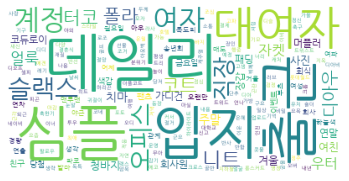

In [ ]:
# id_1
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white",width = 600, height = 800)
cloud = wc.generate_from_frequencies(counter_list[1])
plt.figure(figsize = (6, 8))
plt.imshow(cloud.recolor(color_func = grey_color_func),interpolation="bilinear")
plt.axis('off')
plt.savefig('166.ootd.png')

(-0.5, 399.5, 199.5, -0.5)

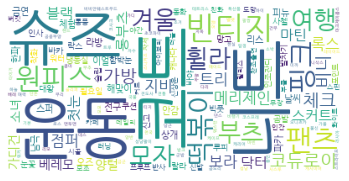

In [ ]:
# id_2
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[2])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

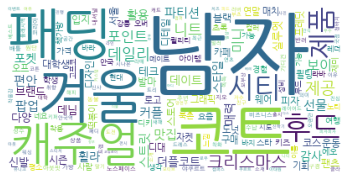

In [ ]:
# id_3
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[3])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

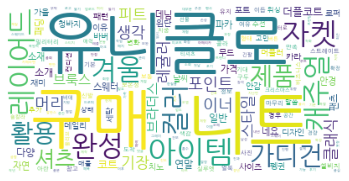

In [ ]:
# id_4
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[4])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

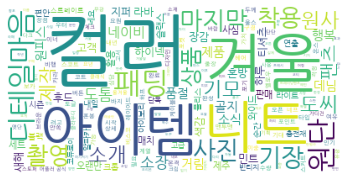

In [ ]:
# id_5
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[5])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

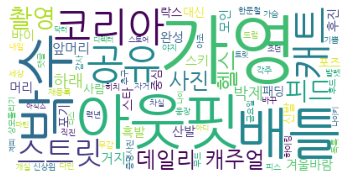

In [ ]:
# id_6  
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[6])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

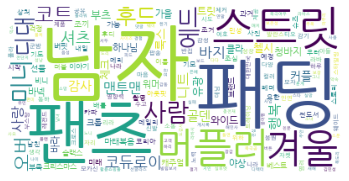

In [ ]:
# id_7
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[7])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

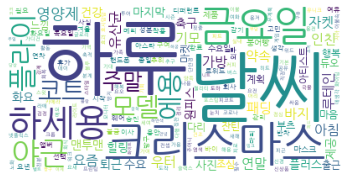

In [ ]:
# id_8    
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[8])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

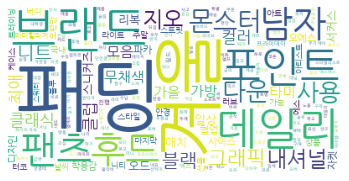

In [ ]:
# id_9
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[9])
plt.imshow(cloud)
plt.axis('off')